<a id='Q0'></a>
<center> <h1> Aviation Herald Project: Topic Modelling</h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>Laurent Bobay, 2024</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> Create dataset of all publicly available articles and comments from www.avherald.com</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Data Exploration and Cleaning</a></li>
            <li> <a style="color:#303030" href='#P2'>Modeling</a></li>
            <li> <a style="color:#303030" href='#P3'>Model Evaluation</a></li>
            <li> <a style="color:#303030" href='#CL'>Conclusion</a></li>
        </ol>
        <strong>Topics Trained:</strong> Notebook Layout, Data Cleaning, Modelling and Model Evaluation
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/07_MLEngineering/index.html" title="momentum"> Module 7, Machine Learning Engineering </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/07_MLEngineering/day1/index.html" title="momentum">Day 1, Data Science Project Development </a>|
        <a style="color:#00BAE5" href="https://drive.google.com/file/d/1SOCQu9Gv3jNNXxvJSszBC3fYNsM0df2F/view?usp=sharing" title="momentum"> Live Coding 1, Simple Prediction Notebook</a>
</strong></nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

www.avherald.com is the standard when it comes to listing aviation incidents and occurrences and lists around 30000 occurrences. The goal of this notebook is scraping the site and store the articles as a dataset. 

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora


### File Paths

In [4]:
path = "../data/interim/preprocessed_dataset.csv" # title,href,text,time_author


<a id='P1'></a>
## [Data Preparation](#P0)

In [23]:
df = pd.read_csv(path)
df

,title,href,text,time_author,headline,comment_authors,comments,occurrence,url,author,created,updated,normalized_text,cities,countries
0,"Malta Air B38M near Dublin on Jul 18th 2024, e...",/h?article=51b4c7ab&opt=0,A Malta Air Boeing 737-8 MAX on behalf of Ryan...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Malta Air B38M near Dublin on Jul 18...,"['By Bagso on Thursday, Jul 18th 2024 23:33Z']","['Professional handling as expected, aircraft ...",incident,https://avherald.com/h?article=51b4c7ab&opt=0,Simon Hradecky,2024-07-18 21:16:00,2024-07-18 21:16:00,air boeing max behalf ryanair registration vva...,"{'bergamo', 'milan', 'dublin', 'cardiff'}","{'italy', 'ireland', 'malta'}"
1,"Avianca A20N at Bogota on Jul 17th 2024, therm...",/h?article=51b4bc28&opt=0,"An Avianca Airbus A320-200N, registration HK-5...","By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Avianca A20N at Bogota on Jul 17th 2...,"['By Aganyur on Friday, Jul 19th 2024 05:23Z',...","['Basically yes, the battery catching fire.the...",incident,https://avherald.com/h?article=51b4bc28&opt=0,Simon Hradecky,2024-07-18 19:33:00,2024-07-18 19:33:00,avianca airbus registration performing flight ...,"{'bogota', 'colombia', 'mobile', 'guarulhos'}","{'colombia', 'brazil'}"
2,"Endeavor CRJ7 at Atlanta on Jul 17th 2024, sme...",/h?article=51b4b9ec&opt=0,An Endeavor Canadair CRJ-700 on behalf of Delt...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Endeavor CRJ7 at Atlanta on Jul 17th...,[],[],incident,https://avherald.com/h?article=51b4b9ec&opt=0,Simon Hradecky,2024-07-18 19:15:00,2024-07-18 19:15:00,endeavor canadair crj behalf airlines registra...,"{'delta', 'atlanta', 'montgomery'}",set()
3,"Delta A333 at Amsterdam on Jan 12th 2023, touc...",/h?article=503a8162&opt=0,"A Delta Airlines Airbus A330-300, registration...","By Simon Hradecky, created Thursday, Jan 12th ...",Incident: Delta A333 at Amsterdam on Jan 12th ...,"['By Bob on Friday, Jul 19th 2024 05:45Z', 'By...",['The winds were gusting 40 knots down the run...,incident,https://avherald.com/h?article=503a8162&opt=0,Simon Hradecky,2023-01-12 19:04:00,2024-07-18 19:00:00,airlines airbus registration performing flight...,"{'detroit', 'delta', 'amsterdam', 'boston'}","{'denmark', 'netherlands'}"
4,"Delta B763 at Edinburgh on Feb 10th 2023, engi...",/h?article=504f9f37&opt=0,"A Delta Airlines Boeing 767-300, registration ...","By Simon Hradecky, created Friday, Feb 10th 20...",Incident: Delta B763 at Edinburgh on Feb 10th ...,"['By (anonymous) on Thursday, Jul 18th 2024 15...","['The aircraft may have over 130,000 flight ho...",incident,https://avherald.com/h?article=504f9f37&opt=0,Simon Hradecky,2023-02-10 17:26:00,2024-07-18 09:47:00,airlines boeing registration performing flight...,"{'delta', 'edinburgh', 'atlanta', 'york', 'alo...",set()
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29020,"Fedex MD-10 gear collapse at Memphis, TN, Dec ...",/h?article=3d769eac&opt=0,NTSB has released the final report of the acci...,"By Simon Hradecky, created Monday, Sep 5th 20...",Final Report: Fedex MD-10 gear collapse at Mem...,[],[],final report,https://avherald.com/h?article=3d769eac&opt=0,Simon Hradecky,2005-09-05 10:02:00,2005-09-05 10:02:00,ntsb released final report accident fedex tenn...,"{'officer', 'memphis'}",set()
29021,"Mandala Airlines B737-200 at Medan, Indonesia ...",/h?article=3d767dad&opt=0,"A B737-200 of Indonesian airline ""Mandala Airl...","By Simon Hradecky, created Monday, Sep 5th 20...","Crash: Mandala Airlines B737-200 at Medan, Ind...",[],[],crash,https://avherald.com/h?article=3d767dad&opt=0,Simon Hradecky,2005-09-05 06:11:00,2005-09-05 06:11:00,indonesian airline mandala airlines flight peo...,"{'jakarta', 'medan'}",{'indonesia'}
29022,"Tans Peru B737-200 at Pucallpa, Amazonas on A...",/h?article=3d6daad4&opt=0,"An airplane of Peruvian Airline ""Tans"", airpla...","By Simon Hradecky, created Tuesday, Aug 23rd 2...","Crash: Tans Peru B737-200 at

In [26]:


# Convert all items in 'text' column to string
df['normalized_text'] = df['normalized_text'].apply(lambda x: str(x) if pd.notna(x) else '')
df.info()

# Add a topic column (removed airline, dates, etc. from the title)
def title_topic(title):
    title_topic = title.split(",")
    if len(title_topic) > 1:
        return title_topic[-1]
    else:
        return title
    
df["topic"] = df.title.apply(title_topic)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29025 entries, 0 to 29024
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            29025 non-null  object
 1   href             29025 non-null  object
 2   text             29025 non-null  object
 3   time_author      29025 non-null  object
 4   headline         29025 non-null  object
 5   comment_authors  29025 non-null  object
 6   comments         29025 non-null  object
 7   occurrence       28744 non-null  object
 8   url              29025 non-null  object
 9   author           29025 non-null  object
 10  created          29025 non-null  object
 11  updated          29025 non-null  object
 12  normalized_text  29025 non-null  object
 13  cities           29025 non-null  object
 14  countries        29025 non-null  object
 15  topic            29025 non-null  object
dtypes: object(16)
memory usage: 3.5+ MB


,title,href,text,time_author,headline,comment_authors,comments,occurrence,url,author,created,updated,normalized_text,cities,countries,topic
0,"Malta Air B38M near Dublin on Jul 18th 2024, e...",/h?article=51b4c7ab&opt=0,A Malta Air Boeing 737-8 MAX on behalf of Ryan...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Malta Air B38M near Dublin on Jul 18...,"['By Bagso on Thursday, Jul 18th 2024 23:33Z']","['Professional handling as expected, aircraft ...",incident,https://avherald.com/h?article=51b4c7ab&opt=0,Simon Hradecky,2024-07-18 21:16:00,2024-07-18 21:16:00,air boeing max behalf ryanair registration vva...,"{'bergamo', 'milan', 'dublin', 'cardiff'}","{'italy', 'ireland', 'malta'}",engine vibrations
1,"Avianca A20N at Bogota on Jul 17th 2024, therm...",/h?article=51b4bc28&opt=0,"An Avianca Airbus A320-200N, registration HK-5...","By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Avianca A20N at Bogota on Jul 17th 2...,"['By Aganyur on Friday, Jul 19th 2024 05:23Z',...","['Basically yes, the battery catching fire.the...",incident,https://avherald.com/h?article=51b4bc28&opt=0,Simon Hradecky,2024-07-18 19:33:00,2024-07-18 19:33:00,avianca airbus registration performing flight ...,"{'bogota', 'colombia', 'mobile', 'guarulhos'}","{'colombia', 'brazil'}",thermal runaway of phone battery after being ...
2,"Endeavor CRJ7 at Atlanta on Jul 17th 2024, sme...",/h?article=51b4b9ec&opt=0,An Endeavor Canadair CRJ-700 on behalf of Delt...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Endeavor CRJ7 at Atlanta on Jul 17th...,[],[],incident,https://avherald.com/h?article=51b4b9ec&opt=0,Simon Hradecky,2024-07-18 19:15:00,2024-07-18 19:15:00,endeavor canadair crj behalf airlines registra...,"{'delta', 'atlanta', 'montgomery'}",set(),smell of burning
3,"Delta A333 at Amsterdam on Jan 12th 2023, touc...",/h?article=503a8162&opt=0,"A Delta Airlines Airbus A330-300, registration...","By Simon Hradecky, created Thursday, Jan 12th ...",Incident: Delta A333 at Amsterdam on Jan 12th ...,"['By Bob on Friday, Jul 19th 2024 05:45Z', 'By...",['The winds were gusting 40 knots down the run...,incident,https://avherald.com/h?article=503a8162&opt=0,Simon Hradecky,2023-01-12 19:04:00,2024-07-18 19:00:00,airlines airbus registration performing flight...,"{'detroit', 'delta', 'amsterdam', 'boston'}","{'denmark', 'netherlands'}",touched down short of runway
4,"Delta B763 at Edinburgh on Feb 10th 2023, engi...",/h?article=504f9f37&opt=0,"A Delta Airlines Boeing 767-300, registration ...","By Simon Hradecky, created Friday, Feb 10th 20...",Incident: Delta B763 at Edinburgh on Feb 10th ...,"['By (anonymous) on Thursday, Jul 18th 2024 15...","['The aircraft may have over 130,000 flight ho...",incident,https://avherald.com/h?article=504f9f37&opt=0,Simon Hradecky,2023-02-10 17:26:00,2024-07-18 09:47:00,airlines boeing registration performing flight...,"{'delta', 'edinburgh', 'atlanta', 'york', 'alo...",set(),engine shut down in flight


#### Topic modelling (LDA method)

In [29]:
# Download NLTK data files (if not already done)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Corpus of the titles
corpus = df.topic.tolist()

# Preprocessing function
def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return words

# Preprocess the corpus
processed_corpus = [preprocess(doc) for doc in corpus]

corpus[:5]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laurent/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/laurent/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/laurent/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[' engine vibrations',
 ' thermal runaway of phone battery after being thrown',
 ' smell of burning',
 ' touched down short of runway',
 ' engine shut down in flight']

In [30]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_corpus)

# Filter out words that occur less than 2 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=2, no_above=0.5)

# Create a Bag-of-Words representation of the documents
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_corpus]


In [31]:
# Set parameters for LDA
num_topics = 30 # Total number of topics in the corpus

lda_model = gensim.models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Title: {df.iloc[idx].title} \nWords: {topic}\n")
    if idx == 5:
        break


Title: Malta Air B38M near Dublin on Jul 18th 2024, engine vibrations 
Words: 0.508*"gear" + 0.233*"unsafe" + 0.121*"tail" + 0.073*"generator" + 0.021*"water" + 0.007*"died" + 0.006*"aft" + 0.001*"balked" + 0.001*"burnt" + 0.000*"acid"

Title: Avianca A20N at Bogota on Jul 17th 2024, thermal runaway of phone battery after being thrown 
Words: 0.430*"strike" + 0.398*"bird" + 0.041*"bomb" + 0.030*"hoax" + 0.024*"flock" + 0.010*"found" + 0.007*"sudden" + 0.007*"loose" + 0.005*"worker" + 0.004*"operation"

Title: Endeavor CRJ7 at Atlanta on Jul 17th 2024, smell of burning 
Words: 0.275*"cockpit" + 0.208*"windshield" + 0.197*"cracked" + 0.170*"smoke" + 0.036*"blown" + 0.021*"back" + 0.014*"despite" + 0.011*"maintenance" + 0.009*"rolled" + 0.008*"nosewheel"

Title: Delta A333 at Amsterdam on Jan 12th 2023, touched down short of runway 
Words: 0.359*"indication" + 0.154*"cargo" + 0.132*"door" + 0.103*"diversion" + 0.069*"smoke" + 0.055*"open" + 0.031*"mechanical" + 0.025*"false" + 0.011*"abor

In [42]:
topic_labels = []

for i, doc_bow in enumerate(bow_corpus):
    doc_topics = lda_model.get_document_topics(doc_bow)
    dominant_topic = max(doc_topics, key=lambda x: x[1])  # Get the topic with the highest probability

    topic_labels.append(dominant_topic[0])


In [43]:
df["topic_label"] = topic_labels

In [44]:
df.head(50)

,title,href,text,time_author,headline,comment_authors,comments,occurrence,url,author,created,updated,normalized_text,cities,countries,topic,topic_label
0,"Malta Air B38M near Dublin on Jul 18th 2024, e...",/h?article=51b4c7ab&opt=0,A Malta Air Boeing 737-8 MAX on behalf of Ryan...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Malta Air B38M near Dublin on Jul 18...,"['By Bagso on Thursday, Jul 18th 2024 23:33Z']","['Professional handling as expected, aircraft ...",incident,https://avherald.com/h?article=51b4c7ab&opt=0,Simon Hradecky,2024-07-18 21:16:00,2024-07-18 21:16:00,air boeing max behalf ryanair registration vva...,"{'bergamo', 'milan', 'dublin', 'cardiff'}","{'italy', 'ireland', 'malta'}",engine vibrations,28
1,"Avianca A20N at Bogota on Jul 17th 2024, therm...",/h?article=51b4bc28&opt=0,"An Avianca Airbus A320-200N, registration HK-5...","By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Avianca A20N at Bogota on Jul 17th 2...,"['By Aganyur on Friday, Jul 19th 2024 05:23Z',...","['Basically yes, the battery catching fire.the...",incident,https://avherald.com/h?article=51b4bc28&opt=0,Simon Hradecky,2024-07-18 19:33:00,2024-07-18 19:33:00,avianca airbus registration performing flight ...,"{'bogota', 'colombia', 'mobile', 'guarulhos'}","{'colombia', 'brazil'}",thermal runaway of phone battery after being ...,26
2,"Endeavor CRJ7 at Atlanta on Jul 17th 2024, sme...",/h?article=51b4b9ec&opt=0,An Endeavor Canadair CRJ-700 on behalf of Delt...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Endeavor CRJ7 at Atlanta on Jul 17th...,[],[],incident,https://avherald.com/h?article=51b4b9ec&opt=0,Simon Hradecky,2024-07-18 19:15:00,2024-07-18 19:15:00,endeavor canadair crj behalf airlines registra...,"{'delta', 'atlanta', 'montgomery'}",set(),smell of burning,5
3,"Delta A333 at Amsterdam on Jan 12th 2023, touc...",/h?article=503a8162&opt=0,"A Delta Airlines Airbus A330-300, registration...","By Simon Hradecky, created Thursday, Jan 12th ...",Incident: Delta A333 at Amsterdam on Jan 12th ...,"['By Bob on Friday, Jul 19th 2024 05:45Z', 'By...",['The winds were gusting 40 knots down the run...,incident,https://avherald.com/h?article=503a8162&opt=0,Simon Hradecky,2023-01-12 19:04:00,2024-07-18 19:00:00,airlines airbus registration performing flight...,"{'detroit', 'delta', 'amsterdam', 'boston'}","{'denmark', 'netherlands'}",touched down short of runway,11
4,"Delta B763 at Edinburgh on Feb 10th 2023, engi...",/h?article=504f9f37&opt=0,"A Delta Airlines Boeing 767-300, registration ...","By Simon Hradecky, created Friday, Feb 10th 20...",Incident: Delta B763 at Edinburgh on Feb 10th ...,"['By (anonymous) on Thursday, Jul 18th 2024 15...","['The aircraft may have over 130,000 flight ho...",incident,https://avherald.com/h?article=504f9f37&opt=0,Simon Hradecky,2023-02-10 17:26:00,2024-07-18 09:47:00,airlines boeing registration performing flight...,"{'delta', 'edinburgh', 'atlanta', 'york', 'alo...",set(),engine shut down in flight,20
5,"Nile A321 at Dammam on Jul 18th 2024, rejected...",/h?article=51b4724b&opt=0,"A Nile Air Airbus A321-200, registration SU-BQ...","By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Nile A321 at Dammam on Jul 18th 2024...,"['By Jack Truss on Thursday, Jul 18th 2024 17:...",['Normally you get brakes fire following a rej...,incident,https://avherald.com/h?article=51b4724b&opt=0,Simon Hradecky,2024-07-18 09:09:00,2024-07-18 09:09:00,nile air airbus registration bql performing fl...,"{'cairo', 'dammam'}",{'egypt'},rejected takeoff due to brakes fire,24
6,"Canada B789 over Atlantic on Jul 8th 2024, bur...",/h?article=51b4143a&opt=0,"An Air Canada Boeing 787-9, registration C-FSB...","By Simon Hradecky, created Wednesday, Jul 17th...",Incident: Canada B789 over Atlantic on Jul 8th...,[],[],incident,https://avherald.com/h?article=51b4143a&opt=0,Simon Hradecky,2024-07-17 19:42:00,2024-07-17 19:42:00,air boeing registration fsbv performing flight...,"{'montreal', 'toro

#### Topic extraction from titles

In [12]:

df

,title,href,text,time_author,headline,comment_authors,comments,occurrence,url,author,created,updated,normalized_text,cities,countries,topic
0,"Malta Air B38M near Dublin on Jul 18th 2024, e...",/h?article=51b4c7ab&opt=0,A Malta Air Boeing 737-8 MAX on behalf of Ryan...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Malta Air B38M near Dublin on Jul 18...,"['By Bagso on Thursday, Jul 18th 2024 23:33Z']","['Professional handling as expected, aircraft ...",incident,https://avherald.com/h?article=51b4c7ab&opt=0,Simon Hradecky,2024-07-18 21:16:00,2024-07-18 21:16:00,air boeing max behalf ryanair registration vva...,"{'bergamo', 'milan', 'dublin', 'cardiff'}","{'italy', 'ireland', 'malta'}",engine vibrations
1,"Avianca A20N at Bogota on Jul 17th 2024, therm...",/h?article=51b4bc28&opt=0,"An Avianca Airbus A320-200N, registration HK-5...","By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Avianca A20N at Bogota on Jul 17th 2...,"['By Aganyur on Friday, Jul 19th 2024 05:23Z',...","['Basically yes, the battery catching fire.the...",incident,https://avherald.com/h?article=51b4bc28&opt=0,Simon Hradecky,2024-07-18 19:33:00,2024-07-18 19:33:00,avianca airbus registration performing flight ...,"{'bogota', 'colombia', 'mobile', 'guarulhos'}","{'colombia', 'brazil'}",thermal runaway of phone battery after being ...
2,"Endeavor CRJ7 at Atlanta on Jul 17th 2024, sme...",/h?article=51b4b9ec&opt=0,An Endeavor Canadair CRJ-700 on behalf of Delt...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Endeavor CRJ7 at Atlanta on Jul 17th...,[],[],incident,https://avherald.com/h?article=51b4b9ec&opt=0,Simon Hradecky,2024-07-18 19:15:00,2024-07-18 19:15:00,endeavor canadair crj behalf airlines registra...,"{'delta', 'atlanta', 'montgomery'}",set(),smell of burning
3,"Delta A333 at Amsterdam on Jan 12th 2023, touc...",/h?article=503a8162&opt=0,"A Delta Airlines Airbus A330-300, registration...","By Simon Hradecky, created Thursday, Jan 12th ...",Incident: Delta A333 at Amsterdam on Jan 12th ...,"['By Bob on Friday, Jul 19th 2024 05:45Z', 'By...",['The winds were gusting 40 knots down the run...,incident,https://avherald.com/h?article=503a8162&opt=0,Simon Hradecky,2023-01-12 19:04:00,2024-07-18 19:00:00,airlines airbus registration performing flight...,"{'detroit', 'delta', 'amsterdam', 'boston'}","{'denmark', 'netherlands'}",touched down short of runway
4,"Delta B763 at Edinburgh on Feb 10th 2023, engi...",/h?article=504f9f37&opt=0,"A Delta Airlines Boeing 767-300, registration ...","By Simon Hradecky, created Friday, Feb 10th 20...",Incident: Delta B763 at Edinburgh on Feb 10th ...,"['By (anonymous) on Thursday, Jul 18th 2024 15...","['The aircraft may have over 130,000 flight ho...",incident,https://avherald.com/h?article=504f9f37&opt=0,Simon Hradecky,2023-02-10 17:26:00,2024-07-18 09:47:00,airlines boeing registration performing flight...,"{'delta', 'edinburgh', 'atlanta', 'york', 'alo...",set(),engine shut down in flight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29020,"Fedex MD-10 gear collapse at Memphis, TN, Dec ...",/h?article=3d769eac&opt=0,NTSB has released the final report of the acci...,"By Simon Hradecky, created Monday, Sep 5th 20...",Final Report: Fedex MD-10 gear collapse at Mem...,[],[],final report,https://avherald.com/h?article=3d769eac&opt=0,Simon Hradecky,2005-09-05 10:02:00,2005-09-05 10:02:00,ntsb released final report accident fedex tenn...,"{'officer', 'memphis'}",set(),Dec 18th 2003
29021,"Mandala Airlines B737-200 at Medan, Indonesia ...",/h?article=3d767dad&opt=0,"A B737-200 of Indonesian airline ""Mandala Airl...","By Simon Hradecky, created Monday, Sep 5th 20...","Crash: Mandala Airlines B737-200 at Medan, Ind...",[],[],crash,https://avherald.com/h?article=3d767dad&opt=0,Simon Hradecky,2005-09-05 06:11:00,2005-09-05 06:11:00,indonesian airline mandala airlines flight peo...,"{'jakarta', 'medan'}",{'indonesia'},crashed on takeoff
29022,"Tans Peru B737-200 at Pucall

In [13]:
len(df.topic.unique())

9168

#### Clustering on titles

In [14]:
from sentence_transformers import SentenceTransformer
import torch

# Set the device to CPU
device = torch.device('cpu')
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

# Example sentences
#sentences = ["This is an example sentence", "Each sentence is converted"]
corpus = df.topic.tolist()
len(corpus)

# Convert sentences to embeddings
embeddings = model.encode(corpus, show_progress_bar=True)

print(embeddings.shape)

/Users/laurent/anaconda3/envs/ds_final_project/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Batches:   0%|          | 0/908 [00:00<?, ?it/s]

(29025, 384)


In [15]:
len(corpus)

29025

In [16]:
from sklearn.cluster import KMeans
from tqdm import tqdm

# To store the errors depending on number of clusters
cluster_errors = []

# Maximum number of clusters
max_clusters = 30


# Try 2 to max_clusters
for n_clusters in tqdm(range(2, max_clusters)):

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)

    # Within cluster error
    wcsse = kmeans.inertia_
    cluster_errors.append(wcsse)
    
    # Get cluster labels for each text
    cluster_labels = kmeans.labels_

  0%|          | 0/28 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 28/28 [00:09<00:00,  2.92it/s]


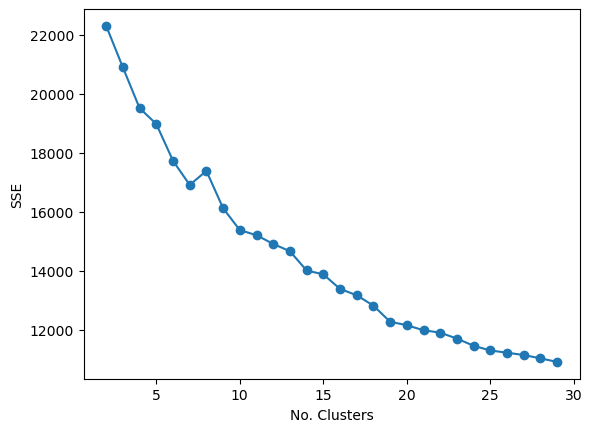

In [17]:
# Elbow:
plt.plot(range(2, max_clusters), cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()

In [18]:
# Perform K-Means clustering with 20 clusters:
kmeans = KMeans(n_clusters=20, random_state=0).fit(embeddings)

# Get cluster labels for each text
cluster_labels = kmeans.labels_

len(cluster_labels)
cluster_labels[:10]

array([ 9,  5, 11,  3,  0, 13, 11,  0, 19,  4], dtype=int32)

In [19]:
from sklearn.manifold import TSNE

# Now apply t-SNE to the transformed data
tsne = TSNE(n_components=2, random_state=42)  # Using 2 components for a 2D visualization

# Determine batch size
batch_size = 3000

# Initialize progress bar
progress = tqdm(total=len(embeddings), desc="Running t-SNE")

# Initialize results array
X_tsne = np.empty((0, 2))

# Iterate over batches
for i in range(0, len(embeddings), batch_size):
    batch = embeddings[i:i + batch_size]
    X_batch = tsne.fit_transform(batch)
    X_tsne = np.vstack([X_tsne, X_batch])
    
    # Update progress bar
    progress.update(len(batch))

# Close progress bar
progress.close()

Running t-SNE: 100%|██████████| 29025/29025 [01:59<00:00, 243.42it/s]


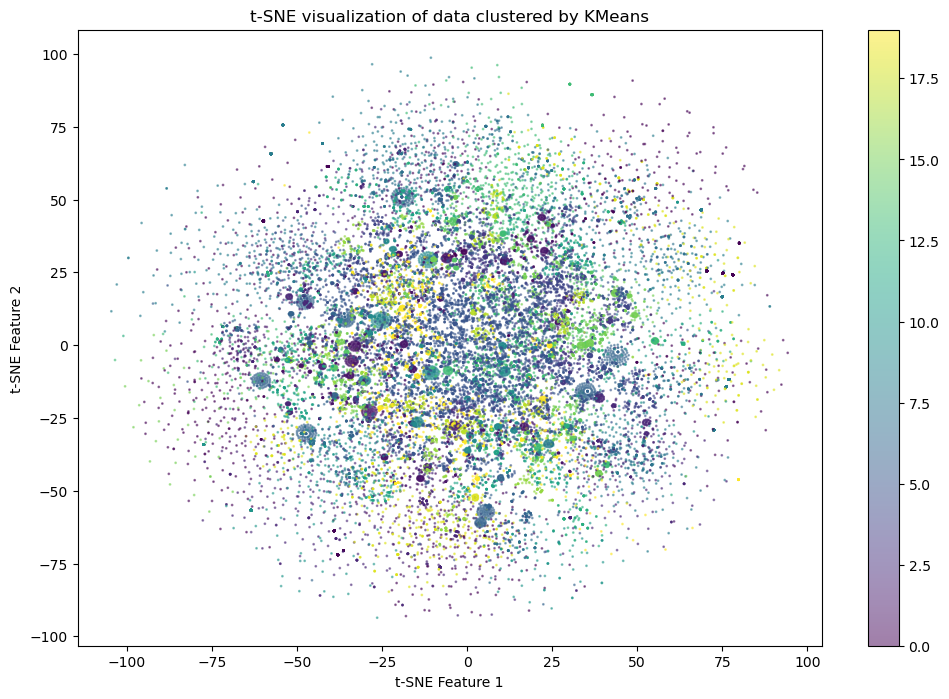

In [20]:
# Plotting the results of t-SNE
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5, s=1)
plt.colorbar()
plt.title('t-SNE visualization of data clustered by KMeans')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [21]:
type(cluster_labels)
cluster_labels[:10]
len(cluster_labels)

29025

In [22]:
df_topic = df["topic"].reset_index()
len(df_topic)
df_topic["label"] = cluster_labels
df_topic

,index,topic,label
0,0,engine vibrations,9
1,1,thermal runaway of phone battery after being ...,5
2,2,smell of burning,11
3,3,touched down short of runway,3
4,4,engine shut down in flight,0
...,...,...,...
29020,29020,Dec 18th 2003,5
29021,29021,crashed on takeoff,13
29022,29022,crashed short of runway in turbulent final ap...,3
29023,29023,rolled uncontrolled and crashed into Red Sea,5


In [100]:
topic_label = {
    0: "Other",
    1: "Rejected Takeoff",
    2: "Turbulence",
    3: "Fuel and Oil",
    4: "Engine",
    5: "Emergency Descent & Medical",
    6: "Gear",
    7: "Smell",
    8: "Flaps",
    9: "Bird Strike",
    10: "Other",
    11: "Engine Shut Down",
    12: "Windows & Wind Shield",
    13: "Abnormal Runway Contact",
    14: "Hydraulic",
    15: "Runway Incursion & Excursion",
    16: "Pilot Incapacitation",
    17: "Fire & Smoke",
    18: "Tire Failure",
    19: "Loss of Cabin Pressure",
}

df_topic["topic_label"] = df_topic.label.apply(lambda x: topic_label[x])
df_topic

,index,topic,label,topic_label
0,0,runway incursion,15,Runway Incursion & Excursion
1,1,tyre damage on departure,18,Tire Failure
2,2,engine shut down in flight,11,Engine Shut Down
3,3,engine issue,4,Engine
4,4,unsafe gear,6,Gear
...,...,...,...,...
28957,28957,Dec 18th 2003,0,Other
28958,28958,crashed on takeoff,13,Abnormal Runway Contact
28959,28959,crashed short of runway in turbulent final ap...,15,Runway Incursion & Excursion
28960,28960,rolled uncontrolled and crashed into Red Sea,0,Other


In [105]:
# Calculate the count of each label
# Calculate the count of each label
label_counts = df_topic['label'].value_counts()

# Map the counts back to the original DataFrame
df_topic['label_count'] = df_topic['label'].map(label_counts)
df_topic

,index,topic,label,topic_label,label_count
0,0,runway incursion,15,Runway Incursion & Excursion,1473
1,1,tyre damage on departure,18,Tire Failure,796
2,2,engine shut down in flight,11,Engine Shut Down,2083
3,3,engine issue,4,Engine,2124
4,4,unsafe gear,6,Gear,1679
...,...,...,...,...,...
28957,28957,Dec 18th 2003,0,Other,3023
28958,28958,crashed on takeoff,13,Abnormal Runway Contact,1927
28959,28959,crashed short of runway in turbulent final ap...,15,Runway Incursion & Excursion,1473
28960,28960,rolled uncontrolled and crashed into Red Sea,0,Other,3023


/var/folders/ld/c81z579x7n940m4_d4tq448m0000gp/T/ipykernel_41598/1172847880.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




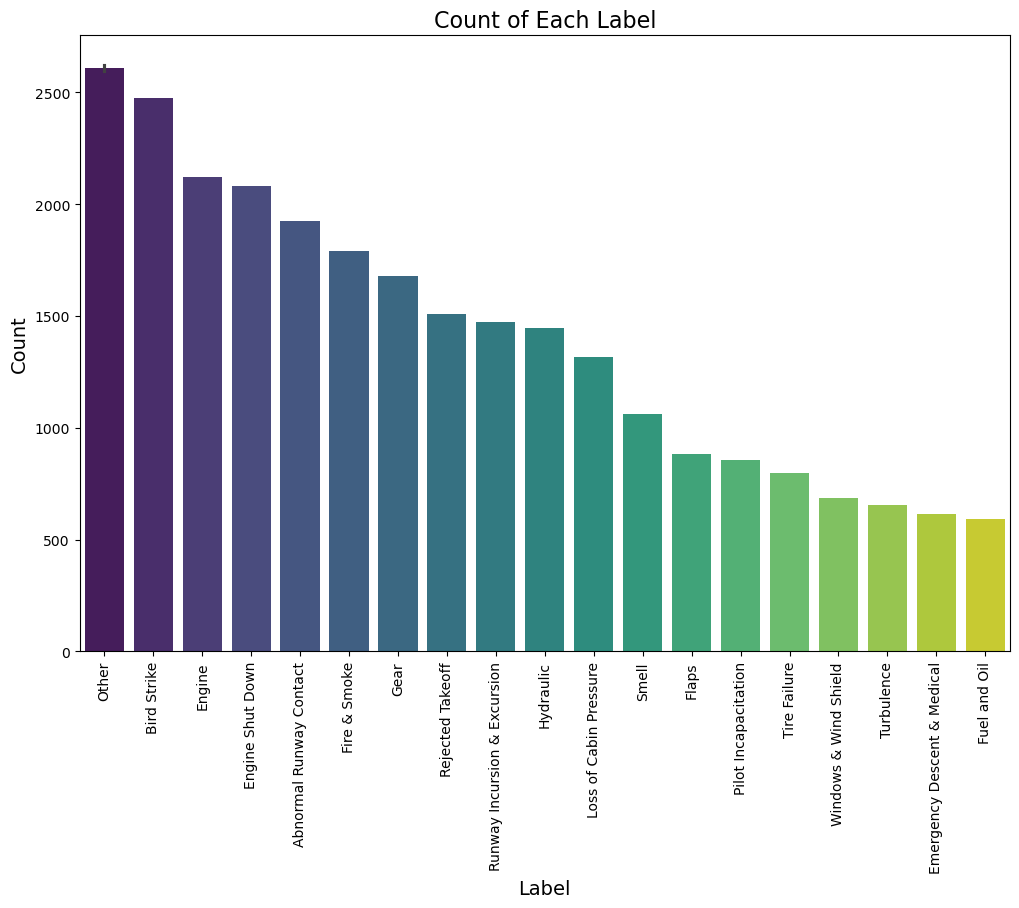

In [110]:
df_topic_sorted = df_topic.sort_values(by="label_count", ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='topic_label', y='label_count', data=df_topic_sorted, palette='viridis')

# Customize labels and title
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Each Label', fontsize=16)
plt.xticks(rotation=90)
plt.show()

## Use of Transformer Pipeline

In [1]:
from transformers import pipeline

In [2]:
nlp_qa = pipeline('question-answering')

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [19]:
corpus = df.text.tolist()[:200]

In [20]:
# Define the question
question = "where did edelweiss air have a fuel problem ?"

# Function to apply the QA pipeline to each document
def answer_question(question, corpus):
    answers = []
    for i, context in tqdm(enumerate(corpus)):
        result = nlp_qa(question=question, context=context)
        answers.append({"document": i, "answer": result['answer'], "score": result['score']})
    return answers

# Get answers from the corpus
answers = answer_question(question, corpus)

# Print the answers
for answer in answers:
  if answer["score"] > 0.8:
    print(f"Document {answer['document']} - Answer: {answer['answer']} (Score: {answer['score']})")

200it [01:27,  2.29it/s]

Document 47 - Answer: Los Angeles (Score: 0.9221720099449158)
Document 54 - Answer: Casablanca (Score: 0.9528437256813049)
Document 128 - Answer: Juba (Score: 0.919273853302002)


In [27]:
markdown_content = corpus[30]
display(Markdown(markdown_content)) 

A Porter Airlines de Havilland Dash 8-400, registration C-GLQP performing flight PD-2375 from Ottawa,ON to Fredericton,NB (Canada), was landing on Fredricton's runway 27 at 14:00L (17:00Z) when the aircraft's tail struck the runway. The crew initiated a go around, climbed to 2000 feet and positioned for another approach to runway 27. The aircraft landed without further incident about 8 minutes after the go around.The aircraft was unable to continue its schedule and is still on the ground in Fredericton (standing Jul 10th 2024).The Canadian TSB reported: "During approach to landing phase, the aircraft experienced  a tail strike which resulted in the flight crew conducted a  go around. Returning to the airport, the flight completed a visual circuit and landed without further incident. The touch runway sensor was illuminated, and the flight crew contacted company operations to advise of the occurrence. Ground crew personal discovered that the underside of the fuselage near the rear cargo door was substantially damaged and reported it immediately. The TSB deployed two investigators to gather information and examine the aircraft."Metars:CYFC 281900Z AUTO 33012G18KT 280V350 9SM BKN066 BKN080 22/09 A2998 RMK SLP155 DENSITY ALT 800FT=CYFC 281815Z AUTO 35012G17KT 9SM SCT071 22/08 A2998 RMK WSHFT AT 1800Z SLP153 DENSITY ALT 800FT=CYFC 281800Z AUTO 30009G16KT 9SM FEW066 21/08 A2998 RMK SLP153 DENSITY ALT 800FT=CYFC 281700Z AUTO 32014KT 9SM BKN071 BKN080 21/10 A2997 RMK SLP152 DENSITY ALT 800FT=CYFC 281600Z AUTO 33015G20KT 9SM SCT066 SCT075 21/07 A2996 RMK SLP147 DENSITY ALT 700FT=CYFC 281529Z AUTO 32017G25KT 290V360 9SM SCT055 SCT072 20/08 A2995 RMK SLP144 DENSITY ALT 700FT=CYFC 281500Z AUTO 30006G17KT 9SM BKN060 18/09 A2994 RMK SLP140 DENSITY ALT 500FT=CYFC 281400Z AUTO 32009G16KT 290V350 9SM FEW043 18/09 A2992 RMK SLP134 DENSITY ALT 500FT=CYFC 281300Z AUTO 33013KT 9SM CLR 17/10 A2989 RMK SLP125 DENSITY ALT 400FT=The tail of the aircraft after landing:

## Text similarity using SentenceTransformer

In [43]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained model from sentence-transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define your texts
texts = corpus

# Define a new text
new_text = "A Lufthansa A320-200, registration D-AIQP performing flight LH-44 from Munich to Hamburg Fuhlsbuettel (Germany) with 132 passengers and 5 crew, was on ILS approach to Hamburg Fuhlbuettel's runway 23 in strong gusting winds following storm system 'Emma' which had battered large parts of Europe with gale force winds. At 13:33L (12:33Z) the airplane flared, the left main gear touched the runway but lifted off again, the right hand wing rose rapidly causing the left wing tip to strike the runway surface and the aircraft veer to the left before the airplane was recovered by the crew and a go around commenced. The airplane landed safely on runway 33 19 minutes later. A video of the approach, touch down, recovery and go-around is available below."

# Generate embeddings for the texts
text_embeddings = model.encode(texts)
new_text_embedding = model.encode([new_text])

# Compute cosine similarity between the new text and the corpus
cosine_scores = util.pytorch_cos_sim(new_text_embedding, text_embeddings)[0].numpy()

# Get the indices of the sorted scores in descending order
sorted_indices = np.argsort(cosine_scores)[::-1]

# Print the sorted similarity scores and corresponding texts
print("Texts sorted by similarity to the new text:")
for idx in sorted_indices[:10]:
    print(f"Text: {texts[idx]}")
    print(f"Similarity Score: {cosine_scores[idx]:.4f}")
    print()


Texts sorted by similarity to the new text:
Text: A Lufthansa Airbus A321-200, registration D-AISR performing flight LH-816 from Frankfurt/Main (Germany) to Gothenburg (Sweden), was on approach to Gothenburg when the crew requested to enter a hold due to "build ups" on the final approach course to Gothenburg's runway 21, approach confirmed they saw build ups on the approach as well and saw lightning, but also advised that a short right hand circuit and short final to runway 21 appeared to be available. After two circuits and assessing their own weather radar as well as discussing with tower about tower's weather radar the crew opted to try the right hand pattern but received a lightning strike on downwind. The aircraft continued for a safe landing on runway 21.The aircraft was unable to depart for the return flight - the flight was cancelled - and is still on the ground in Gothenburg about 29 hours after landing.Metars:ESGG 091420Z 22018KT 9999 SHGSRA SCT018CB BKN037 09/06 Q0996=ESGG 0

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>